In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Objective 1: A rough view on data

In [2]:
# Selecting year 17 as our testing target
test = pd.read_csv("checkbook-explorerfy17.csv", sep=',', encoding='gbk')

C:\Users\Zhaoguo Zhu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Print out the first 5 rows
test.head()

,Voucher,Voucher Line,Distribution Line,Entered,Month (Number),Fiscal Month,Month,Fiscal Year,Year,Vendor Name,Account,Account Descr,Dept,Department Name,Program,Monetary Amount
0,L0004499,1,1,7/1/2016,7,1,July,2017,2016,W & W Construction Corp.,52926,ContServ Loans,188300,Neighborhood Development,Housing Development,"$5,960.00"
1,L0004500,1,1,7/1/2016,7,1,July,2017,2016,Wayne At Columbia LLC,52926,ContServ Loans,188300,Neighborhood Development,Housing Development,"$7,631.00"
2,L0004501,1,1,7/7/2016,7,1,July,2017,2016,875-889 ALH LLC,52926,ContServ Loans,188300,Neighborhood Development,Housing Development,"$600,000.00"
3,L0004502,1,1,7/8/2016,7,1,July,2017,2016,"Hachem,Khalil",52926,ContServ Loans,188300,Neighborhood Development,Housing Development,"$27,945.00"
4,L0004503,1,1,7/8/2016,7,1,July,2017,2016,W & W Construction Corp.,52926,ContServ Loans,188300,Neighborhood Development,Housing Development,"$3,997.50"


Based on the graph we can clearly see that each column provides some brief information of a specific case of city investment, including case number, case date, how much the city spend, which department the city spend on, what program of that department benefits from this investment, etc.

In [4]:
# Showcase the datatype of each column
test.dtypes

Voucher              object
Voucher Line          int64
Distribution Line     int64
Entered              object
Month (Number)        int64
Fiscal Month          int64
Month                object
Fiscal Year           int64
Year                  int64
Vendor Name          object
Account               int64
Account Descr        object
Dept                 object
Department Name      object
Program              object
Monetary Amount      object
dtype: object

Our goal of this assignment focus on where the city has spent the most and the least amount of money over the last 5 years, therefore we care only few features of the data. What we need is the Department Name and the Monetary Amount. For Monetary Amount, we obviously need to preprocess them into numeric format. Then we sum the money spent on each unique department, same for the other years.

Objective 2: Data Processing for each Year

In [5]:
# Year 2020
amounts = []
df = pd.read_csv("checkbook_explorerfy20.csv", sep=',', encoding='gbk')
List1 = df["Dept_Name"].unique()
Dict1 = dict()

for i in List1:
    Dict1[i] = df.loc[df["Dept_Name"] == i, "Monetary_Amount"].sum()

In [6]:
# Year 2019
df = pd.read_csv("checkbook-explorer-fy19.csv", sep=',', encoding='gbk')
List1 = df["Department Name"].unique()
Dict2 = dict()

for i in List1:
    Dict2[i] = df.loc[df["Department Name"] == i, "Monetary Amount"].sum()

C:\Users\Zhaoguo Zhu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# Year 2018
df = pd.read_csv("checkbook-explorerfy18.csv", sep=',', encoding='gbk')
List1 = df["Department Name"].unique()
Dict3 = dict()

for i in List1:
    Dict3[i] = df.loc[df["Department Name"] == i, "Monetary Amount"].sum()

In [8]:
# Year 2017
df = pd.read_csv("checkbook-explorerfy17.csv", sep=',', encoding='gbk')
df['Monetary Amount'] = pd.to_numeric(df['Monetary Amount'].replace('\$|,', '', regex=True).replace('\\([^\\(]*\\)', '', regex=True))
List1 = df["Department Name"].unique()
Dict4 = dict()

for i in List1:
    Dict4[i] = df.loc[df["Department Name"] == i, "Monetary Amount"].sum()   

C:\Users\Zhaoguo Zhu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
# Year 2016
df = pd.read_csv("checkbook-explorerfy16.csv", sep=',', encoding='gbk')
df['Monetary Amount'] = pd.to_numeric(df['Monetary Amount'].replace('\$|,', '', regex=True).replace('\\([^\\(]*\\)', '', regex=True))
List1 = df["Department Name"].unique()
Dict5 = dict()

for i in List1:
    Dict5[i] = df.loc[df["Department Name"] == i, "Monetary Amount"].sum()

Now data from each year was processed into deparate dictionary. Each dictionary contains key that stands for unique department and value that stands for the amount of money that is spent on that department. What we need to do next is to ceate an collective dictionary and append department and money from each year. If the department that is about to be appended already exist in the dictionary, obviously we will add up that money. Finally, we just need to sort this dictionary based on value to see departments that got most and least funds.

Objective 3: Ceate dictionary to sum up all 5 years and find max year (will come in handy in Object 5)

In [10]:
AggDict = dict()
MaxDict = dict()
for key, value in Dict1.items():
    if key in AggDict:
        AggDict[key] += value
        if value > MaxDict[key]:
            MaxDict[key] = value
    else:
        AggDict[key] = value
        MaxDict[key] = value
        
for key, value in Dict2.items():
    if key in AggDict:
        AggDict[key] += value
        if value > MaxDict[key]:
            MaxDict[key] = value
    else:
        AggDict[key] = value
        MaxDict[key] = value

for key, value in Dict3.items():
    if key in AggDict:
        AggDict[key] += value
        if value > MaxDict[key]:
            MaxDict[key] = value
    else:
        AggDict[key] = value
        MaxDict[key] = value

for key, value in Dict4.items():
    if key in AggDict:
        AggDict[key] += value
        if value > MaxDict[key]:
            MaxDict[key] = value
    else:
        AggDict[key] = value
        MaxDict[key] = value

for key, value in Dict5.items():
    if key in AggDict:
        AggDict[key] += value
        if value > MaxDict[key]:
            MaxDict[key] = value
    else:
        AggDict[key] = value
        MaxDict[key] = value

In [11]:
# Sort Dictionary and print 
AggAmounts = sorted(AggDict.items(), key=lambda x: x[1], reverse=True)
AggAmounts

[('Boston Public School Dept', 1668805792.23),
 ('Health Insurance', 1554031094.6399999),
 ('Public Works Department', 569021060.9799999),
 ('Neighborhood Development', 346447998.69),
 ('Treas Dept - Treasury Division', 277970376.15),
 ('Police Department', 239193544.90999997),
 ('Dpt of Innovation & Technology', 162440377.64999998),
 ('Parks & Recreation Department', 154721817.1),
 ('Fire Department', 151948050.26000002),
 ('Library Department', 150003642.1),
 ('Snow Removal', 87078844.59),
 ('Property Management', 79489108.3),
 ('Transportation Department', 69190949.13999999),
 ('Boston Center-Youth & Families', 48411753.629999995),
 ('Emergency Management', 34418788.9),
 ('Central Fleet Management', 29341630.259999998),
 ('Elderly Commission', 26239932.740000002),
 ('Parking Clerk', 24885396.85),
 ('Environment Department', 22920476.240000002),
 ('Traffic Department', 20930003.77),
 ('Office of Economic Development', 15437595.18),
 ('Collecting Division', 14328947.290000001),
 ('SPO

Therefore the department that got the most funds for the past five years is "Boston Public School Dept (1668805792.23 dollars)," the department that got the least funds for the past five years is "Small and  Local Business(7.47 dollars)."

Objective 4: Showcase the trend

We tried different ways to analyze the department data over the 5 year period and we found that using a heatmap is a good way of displaying it. Up in Object 3, we calculated the dictonary MaxDict\[key\] storing max year for each department. For each department, it contains the maximum amount of money that city of Boston has spent in a calendar year. To explore trends in financing, we decided to relate each year's expenditure (let's call it E(x,y) where x is the year, and y is the department) to the maximum year's: MaxDict\[x\]. This gives us a visual representation of how financing changed over the 5 year period. Heatmap H(x,y) represents the ratio E(x,y)/MaxDict\[x\]. On the X-axis we have each of the five years and on the Y-axis we have the department name.

C:\Users\Zhaoguo Zhu\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


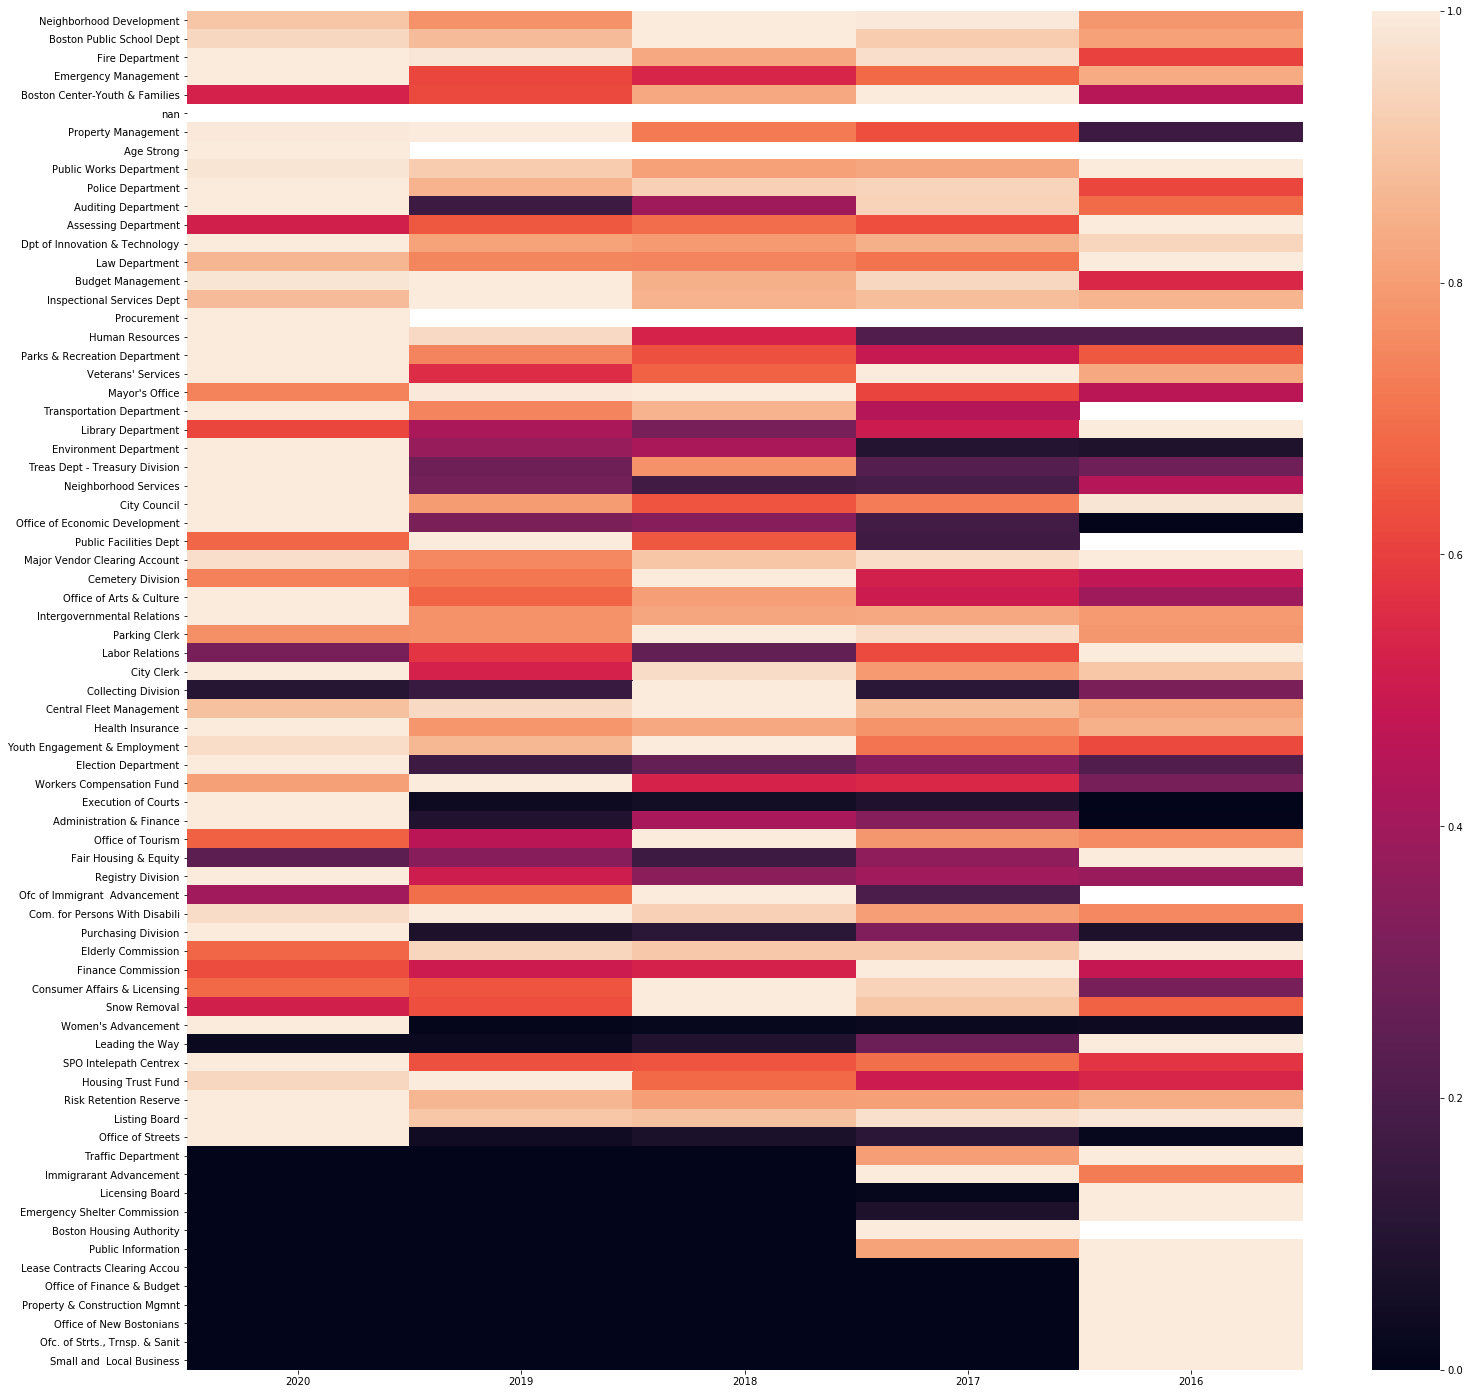

In [12]:
max2020 = Dict1[max(Dict1, key=Dict1.get)]
max2019 = Dict2[max(Dict2, key=Dict2.get)]
max2018 = Dict3[max(Dict3, key=Dict3.get)]
max2017 = Dict4[max(Dict4, key=Dict4.get)]
max2016 = Dict5[max(Dict5, key=Dict5.get)]
AggDict['nan']=1.0

AggDictArray = dict()
for key, value in Dict1.items():
    if key in AggDictArray:
        AggDictArray[key].append(value/MaxDict[key])
    else:
        AggDictArray[key] = [value/MaxDict[key]]
        
for key, value in Dict2.items():
    if key in AggDictArray:
        AggDictArray[key].append(value/MaxDict[key])
    else:
        AggDictArray[key] = [0,value/MaxDict[key]]

for key, value in Dict3.items():
    if key in AggDictArray:
        AggDictArray[key].append(value/MaxDict[key])
    else:
        AggDictArray[key] = [0,0,value/MaxDict[key]]

for key, value in Dict4.items():
    if key in AggDictArray:
        AggDictArray[key].append(value/MaxDict[key])
    else:
        AggDictArray[key] = [0,0,0,value/MaxDict[key]]

for key, value in Dict5.items():
    if key in AggDictArray:
        AggDictArray[key].append(value/MaxDict[key])
    else:
        AggDictArray[key] = [0,0,0,0,value/MaxDict[key]]

#AggDictArray
plt.figure(figsize=(25,25))
hmap = pd.DataFrame.from_dict(AggDictArray, orient='index', columns=['2020', '2019', '2018', '2017', '2016'])
sns.heatmap(hmap)

Finding 1. For department "Boston Public School Dept," although it is the department that got the most funds, the trend of this department is not always going up. For the first 3 years, the funds is increasing indeed, but for year 2019 it suddenly goes down, and then slightly goes up again in 2020. Therefore, it does not always mean that the department got the most funds has the best trend, it might just mean this department need a lot of money.

Finding 2. For department "Small and local business," we can not even showcase any trend for it because the city stopped funding it from year 2017.

Finding 3. Many of the departments haven't received any funding between 2018-2020 (the pitch black at the bottom of the chart), these most notably include: Traffic Department, Immigrant Advancement, Public Information, Small and Local Businesses, and many others.

Finding 4. City of Boston spend the most money on its departments in year 2020. Makes sense considering economic growth.

Objective 5, Identify Department that got the best return and that got the least return

The dataset we will be using is CAPITAL BUDGET dataset from Analyze Boston. It is the City’s plan to make critical investments in the City’s infrastructure like, schools, roads, bridges, bike lanes, libraries, and more. We have searched for a long time for a dataset that can directly show anual return from city investment but unfortunately there is no such appropriate data. Therefore we design a way that can possibly indicate the return: if the city has been adding fund to one department, that means investing on that department is a prudent investment and benefitial investment.

In [13]:
# Show brief information about the data
test2 = pd.read_csv("fy21-fy25-recommended-capital-plan.csv", sep=',', encoding='gbk')
test2.head()

,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,Grant_Existing,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
0,Office of Arts & Culture,Percent for the Arts,One percent of the City抯 annual capital budget...,Office of Arts and Culture,Annual Program,Citywide,"5,400,000","2,000,000","7,600,000",-,...,-,"140,000","500,000","14,360,000",-,-,-,-,-,"15,000,000"
1,Office of Arts & Culture,Jamaica Plain Branch Library Art,Create and install permanent artwork at the Ja...,Office of Arts and Culture,In Design,Jamaica Plain,"200,000",-,-,-,...,"80,000","90,000","30,000",-,-,-,-,-,-,"200,000"
2,Boston Planning and Development Agency,RFMP Black Falcon Avenue and Terminal Street,Resurface Black Falcon Avenue and Terminal Str...,Boston Planning and Development Agency,In Construction,South Boston,"1,400,000",-,-,-,...,-,-,"1,100,000","300,000",-,-,-,-,-,"1,400,000"
3,Boston Planning and Development Agency,Strategic Planning Area Transportation Study,Analyze transportation capacity and develop co...,Boston Planning and Development Agency,Study Underway,Various neighborhoods,"250,000",-,-,-,...,"146,070","75,000","28,930",-,-,-,-,-,-,"250,000"
4,Boston Planning and Development Agency,RFMP Dry-dock 4,Develop a design for the permanent closure of ...,Boston Planning and Development Agency,In Design,South Boston,"250,000",-,-,-,...,"124,800","80,000","45,200",-,-,-,-,-,-,"250,000"


In [14]:
print(test2.isnull().sum())

Department                 0
Project_Name               0
Scope_Of_Work              0
PM_Department              0
Project_Status             0
Neighborhood              17
Authorization_Existing     0
Authorization_FY           0
Authorization_Future       0
 Grant_Existing            0
 Grant_FY                  0
 Grant_Future              0
GO_Expended                0
Capital_Year_0             0
 CapitalYear_1             0
Capital_Year_25            0
Grant_Expended             0
Grant_Year_0               0
 Grant_Year_1              0
GrantYear_25               0
External_Funds             0
Total_Project_Budget       0
dtype: int64


In [15]:
test2.dtypes

Department                object
Project_Name              object
Scope_Of_Work             object
PM_Department             object
Project_Status            object
Neighborhood              object
Authorization_Existing    object
Authorization_FY          object
Authorization_Future      object
 Grant_Existing           object
 Grant_FY                 object
 Grant_Future             object
GO_Expended               object
Capital_Year_0            object
 CapitalYear_1            object
Capital_Year_25           object
Grant_Expended            object
Grant_Year_0              object
 Grant_Year_1             object
GrantYear_25              object
External_Funds            object
Total_Project_Budget      object
dtype: object

In [16]:
test2.describe()

,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,Grant_Existing,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
count,329,329,329,329,329,312,329,329,329,329,...,329,329,329,329,329,329,329,329,329,329
unique,17,329,302,17,7,24,151,62,45,51,...,108,65,91,182,24,22,31,39,20,189
top,Parks and Recreation Department,Youth Budget Round 6,Upgrades to play lot.,Public Facilities Department,In Design,Citywide,-,-,-,-,...,-,-,-,-,-,-,-,-,-,"1,000,000"
freq,87,1,7,102,85,55,88,224,283,267,...,222,174,53,91,306,297,271,285,309,21


It is weird that this dataset only shows 17 unique department. We eventually decide that these 17 departments will be the only department we work on.

In [21]:
# Repeat same procedure to sum money spent

lst = test2["Department"].unique()
Dict_21 = dict()

for i in lst:
    Dict_21[i] = df.loc[df["Department"] == i, "Total_Project_Budget"].sum()
Dict_21    

KeyError: 'Department'